In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# SKLearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df_admited = pd.read_csv("data_sets/university_admition.txt", header=None)
df_admited.columns = ['exam1','exam2','admited']
df_admited.head(10)

,exam1,exam2,admited
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [3]:
# Separate features and labels
'''
x_train shape: (50, 2)
y_train shape: (50, 1)
'''
features = df_admited.loc[:,['exam1','exam2']]
labels = df_admited.loc[:,['admited']]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.5)

In [4]:
# Sigmoid function, that receibes any real number and return a probability between 0 and 1
def sigmoid(z):
    output = 1 / (1 + np.exp(-z))
    return output

In [5]:
# Predict function. This functiion will return a 1D array wrapping the predicted valus E.g [1,0,0,0,1, ...] 
def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

In [6]:
# In this cawse we use 'x' instead of 'x_trainig' because this functions
# could be used to predict the probability for new values (features)
def predict_probs(x, weights):
    return sigmoid(np.dot(x, weights))

In [7]:
def prediction(x, weights, threshold=0.5):
    return predict_probs(x, weights) >= threshold

In [8]:
# Cost function: This function will returns the cost value for each iteration in the process of gradient descent
def cost_function(hipotesis, x_train, y_train, weights, bias):
    
    observations = len(y_train)
    
    #Take the error when label=1 (y=1)
    class1_cost = -y_train*np.log(hipotesis + bias)
    
    # Calculate the cost when the label=0 (y=0)
    class2_cost  = (1 - y_train)*np.log((1 - hipotesis) + bias)
    
    # Take the sum of both costs
    cost_contribution = class1_cost - class2_cost
    
    # Take the average cost
    cost = np.sum(cost_contribution) / observations
    
    return cost
    

In [9]:
# Vectorized Gradient Descent
def dradient_descent(hipotesis, x_train, y_train, weights, learning_rate, bias):
    
    observations = len(y_train)
    
    '''
    np.transpose(x_train) shape: (2, 50)
    hipotesis shape: (50, 1)
    y_train shape: (50, 1)
    '''
    
    #print('np.transpose(x_train) shape: {}'.format(np.transpose(x_train).shape))
    #print('hipotesis shape: {}'.format(hipotesis.shape))
    #print('y_train shape: {}'.format(y_train.shape))
    #print('hipotesis - y_training shape: {}'.format((hipotesis - y_train).shape))
    
    #2 Returns a (2,1) matrix holding 2 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(np.transpose(x_train),  (hipotesis - y_train))
    #db = np.sum(predictions - labels) / observations
    
    '''
    gradient shape: (2, 1)
    weights sahpe: (2, 1)
    '''

    #3 Take the average cost derivative for each feature
    gradient /= observations

    #4 - Multiply the gradient by our learning rate
    gradient *= learning_rate

    #5 - Subtract from our weights to minimize cost
    weights = weights.reshape(len(weights),1)
    weights -= gradient
    #bias -= (learning_rate * db) 

    return weights
    

In [10]:
# Training
def train(x_train, y_train, weights, learning_rate, iterations, bias):
    cost_history = []
    observations = len(y_train)
    
    for i in range(iterations):
        z = np.dot(x_train, weights)
        hipotesis = sigmoid(z).reshape(observations, 1)
        
        weights_updated = dradient_descent(hipotesis, x_train, y_train, weights, learning_rate, bias)
        
        # Compute the cost assosiated
        cost = cost_function(hipotesis, x_train, y_train, weights_updated, bias)
        cost_history.append(cost)
        
        # Log Progress
        if i % 1000 == 0:
            print("iterations: {} cost: {}".format(i,cost))
        
    return weights_updated, cost_history

In [11]:
# Execute
m,n = features.shape
weights = np.ones(n) # Inital colomn vector of theta
learning_rate = 0.001
iterations = 50000
bias = 0.0001

weights.reshape(n,1)

weights_result,cost_history = train(x_train, y_train, weights, learning_rate, iterations, bias)
print("cost_history: {}".format(cost_history))


iterations: 0 cost: admited    3.499867
dtype: float64
iterations: 1000 cost: admited    0.60699
dtype: float64
iterations: 2000 cost: admited    0.60699
dtype: float64
iterations: 3000 cost: admited    0.60699
dtype: float64
iterations: 4000 cost: admited    0.60699
dtype: float64
iterations: 5000 cost: admited    0.60699
dtype: float64
iterations: 6000 cost: admited    0.60699
dtype: float64
iterations: 7000 cost: admited    0.60699
dtype: float64
iterations: 8000 cost: admited    0.60699
dtype: float64
iterations: 9000 cost: admited    0.60699
dtype: float64
iterations: 10000 cost: admited    0.60699
dtype: float64
iterations: 11000 cost: admited    0.60699
dtype: float64
iterations: 12000 cost: admited    0.60699
dtype: float64
iterations: 13000 cost: admited    0.60699
dtype: float64
iterations: 14000 cost: admited    0.60699
dtype: float64
iterations: 15000 cost: admited    0.60699
dtype: float64
iterations: 16000 cost: admited    0.60699
dtype: float64
iterations: 17000 cost: ad

In [12]:
# Prediction
predict = prediction(x_test, weights_result)
print(predict)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [ True]]


Text(0, 0.5, 'cost')

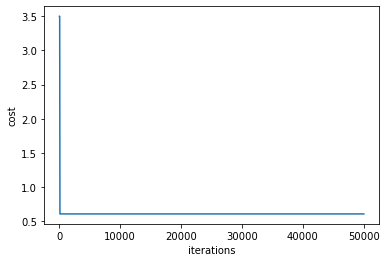

In [13]:
# Visualice the cost fuction for each iteration in the batch gradient descend algorithm
iterations_range = list(range(0,iterations))
plt.plot(iterations_range, cost_history, label='linear')  # Plot some data on the (implicit) axes.
plt.xlabel('iterations')
plt.ylabel('cost')


In [14]:
def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels-actual_labels.T
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))
    

In [15]:
# Evaluate the accuracy of the model
#accu = accuracy(prediction_decision_boundary, labels)
#print(accu)
y_test_boolean = y_test >= 0.5


print("p: {}".format(predict.ravel()))
print("t: {}".format(y_test_boolean))

print('predict shape: {}'.format(predict.shape))
print('y_test_boolean shape: {}'.format(y_test_boolean.shape))
#pred_array = np.array(pred).reshape(1,20)
#print("y_test_trans shape: {}".format(y_test_trans.shape))
#print("pred_array shape: {}".format(pred_array.shape))

print(accuracy_score(y_test_boolean, predict))

p: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
t:     admited
43    False
34    False
96     True
31     True
56     True
24     True
37     True
42     True
77     True
46     True
15     True
81     True
11    False
19     True
84     True
17    False
72     True
88     True
28    False
14    False
22    False
76     True
36    False
93     True
44    False
3      True
89    False
99     True
13     True
27    False
83     True
62    False
26     True
38    False
16     True
61    False
67    False
39    False
97     True
2     False
4      True
60     True
45    False
20    False
68     True
9      True
75     True
21     True
86    False
55    False
predict shape: (50, 1)
y_test_boolean shape: (50, 1)
0.58


In [115]:
lr_model = LogisticRegression(solver = 'lbfgs')
lr_model.fit(x_train, y_train)
lr_preds = lr_model.predict(x_test)
lr_preds = lr_preds.tolist()

print(lr_preds)
y_test_boolean = y_test >= 0.5

print(accuracy_score(y_test_boolean, lr_preds))
# Use score method to get accuracy of model
score = lr_model.score(x_test, y_test)
print(score)

[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0]
0.86
0.86


C:\Users\osciv\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
